In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('minisaurus_new.csv')

In [5]:
df.columns

Index(['star_mass', 'logL', 'log_R', 'log_g', 'surf_avg_omega_div_omega_crit',
       'surf_avg_v_rot', 'profile_number', 'Myr', 'm', 'z', 'v', 'tr_num',
       'density', 'teff', 'gyre_fn', 'n1ell0m0', 'n2ell0m0', 'n3ell0m0',
       'n4ell0m0', 'n5ell0m0', 'n6ell0m0', 'n7ell0m0', 'n8ell0m0', 'n9ell0m0',
       'n10ell0m0', 'n1ell1m0', 'n2ell1m0', 'n3ell1m0', 'n4ell1m0', 'n5ell1m0',
       'n6ell1m0', 'n7ell1m0', 'n8ell1m0', 'n9ell1m0', 'n10ell1m0',
       'n1ell1dfreq', 'n2ell1dfreq', 'n3ell1dfreq', 'n4ell1dfreq',
       'n5ell1dfreq', 'n6ell1dfreq', 'n7ell1dfreq', 'n8ell1dfreq',
       'n9ell1dfreq', 'n10ell1dfreq', 'Dnu', 'eps', 'omega', 'Prot', 'omega_c',
       'logR_p', 'logR_e', 'log_mean_density'],
      dtype='object')

In [32]:
star1 = df.query("m == 1.7 & z == 0.015 & v == 10")
star1.sort_values(by=['Myr'], inplace=True)

star2 = df.query("m == 1.7 & z == 0.015 & v == 18")
star2.sort_values(by=['Myr'], inplace=True)

/var/folders/sb/dk38f76562ng2fhw85ll93vc0000gp/T/ipykernel_70521/1708106095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star1.sort_values(by=['Myr'], inplace=True)
/var/folders/sb/dk38f76562ng2fhw85ll93vc0000gp/T/ipykernel_70521/1708106095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star2.sort_values(by=['Myr'], inplace=True)


In [39]:
M_range = np.arange(1.2, 2.22, 0.02)
Z_range = np.arange(0.001, 0.027, 0.001)
V_range = np.arange(0, 22, 2.)

In [44]:
Z_range

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026])

In [42]:
data_dict = {}
for m, v, z in zip(M_range, V_range, Z_range):
    key = f"m{m}_z{z}_v{v}"
    data_dict[key] = pd.DataFrame()

for i, row in df.iterrows():
    key = f"m{row['m']}_z{row['z']}_v{row['v']}"
    pd.concat([data_dict[key], row], axis=1)

KeyError: 'm1.2_z0.001_v2.0'

(6.0, 20.0)

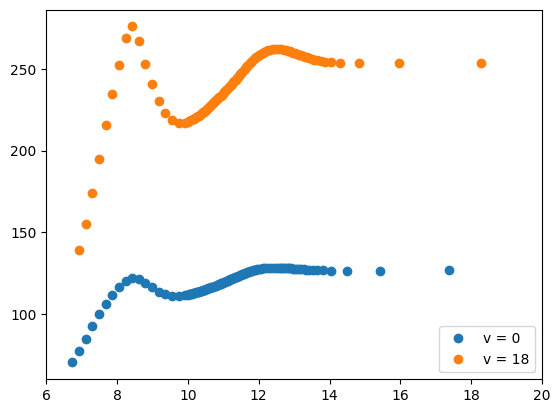

In [33]:
plt.plot(star1['Myr'], star1['surf_avg_v_rot'], 'o', label='v = 0')
plt.plot(star2['Myr'], star2['surf_avg_v_rot'], 'o', label='v = 18')
plt.legend()
plt.xlim(6, 20)

In [27]:
star1

m      z    v         Myr      logL     teff   density     log_R   
1618342  1.7  0.015  0.0    6.602673  0.898306  6032.12  0.099506  0.410867  \
1618343  1.7  0.015  0.0    6.790173  0.933365  6116.23  0.095796  0.416368   
1618344  1.7  0.015  0.0    6.977673  0.967556  6215.42  0.093752  0.419489   
1618345  1.7  0.015  0.0    7.165173  1.000712  6336.12  0.093834  0.419362   
1618346  1.7  0.015  0.0    7.352673  1.032395  6493.94  0.097487  0.413834   
...      ...    ...  ...         ...       ...      ...       ...       ...   
1618546  1.7  0.015  0.0  602.950905  1.028701  8038.36  0.355176  0.226668   
1618547  1.7  0.015  0.0  618.593915  1.030604  8026.69  0.349787  0.228882   
1618548  1.7  0.015  0.0  633.920770  1.032476  8015.04  0.344516  0.231080   
1618549  1.7  0.015  0.0  648.942722  1.034315  8003.36  0.339353  0.233266   
1618550  1.7  0.015  0.0  663.500000  1.036101  7991.82  0.334358  0.235412   

            log_g  surf_avg_omega_div_omega_crit  ...  n3ell1dfreq   
1618342  3.846782                            0.0  ...          0.0  \
1618343  3.835781                            0.0  ...          0.0   
1618344  3.829538                            0.0  ...          0.0   
1618345  3.829792                            0.0  ...          0.0   
1618346  3.840848                            0.0  ...          0.0   
...           ...                            ...  ...          ...   
1618546  4.215180                            0.0  ...          0.0   
1618547  4.210753                            0.0  ...          0.0   
1618548  4.206357                            0.0  ...          0.0   
1618549  4.201985                            0.0  ...          0.0   
1618550  4.197692                            0.0  ...          0.0   

         n4ell1dfreq  n5ell1dfreq  n6ell1dfreq  n7ell1dfreq  n8ell1dfreq   
1618342          0.0          0.0          0.0          0.0          0.0  \
1618343          0.0          0.0          0.0          0.0          0.0   
1618344          0.0          0.0          0.0          0.0          0.0   
1618345          0.0          0.0          0.0          0.0          0.0   
1618346          0.0          0.0          0.0          0.0          0.0   
...              ...          ...          ...          ...          ...   
1618546          0.0          0.0          0.0          0.0          0.0   
1618547          0.0          0.0          0.0          0.0          0.0   
1618548          0.0          0.0          0.0          0.0          0.0   
1618549          0.0          0.0          0.0          0.0          0.0   
1618550          0.0          0.0          0.0          0.0          0.0   

         n9ell1dfreq  n10ell1dfreq    Dnu    eps  
1618342          0.0           0.0  3.706  1.008  
1618343          0.0           0.0  3.569  1.095  
1618344          0.0           0.0  3.440  1.222  
1618345          0.0           0.0  3.332  1.374  
1618346          0.0           0.0  3.290  1.489  
...              ...           ...    ...    ...  
1618546          0.0           0.0  5.942  1.744  
1618547          0.0           0.0  5.893  1.752  
1618548          0.0           0.0  5.845  1.759  
1618549          0.0           0.0  5.797  1.766  
1618550          0.0           0.0  5.751  1.772  

[209 rows x 47 columns]

In [28]:
star2

m      z     v         Myr      logL     teff   density     log_R   
1620206  1.7  0.015  20.0    7.305346  0.991926  6006.36  0.070189  0.461393  \
1620207  1.7  0.015  20.0    8.805346  1.055298  6130.53  0.063757  0.475306   
1620208  1.7  0.015  20.0    8.992846  1.009696  6678.40  0.124732  0.378157   
1620209  1.7  0.015  20.0    9.180346  0.961350  7029.85  0.200511  0.309437   
1620210  1.7  0.015  20.0    9.367846  0.918509  7038.56  0.234222  0.286940   
...      ...    ...   ...         ...       ...      ...       ...       ...   
1620407  1.7  0.015  20.0  645.136611  1.013507  6739.20  0.129981  0.372190   
1620408  1.7  0.015  20.0  649.211174  1.013989  6730.01  0.128706  0.373616   
1620409  1.7  0.015  20.0  654.100649  1.014566  6720.43  0.127357  0.375142   
1620410  1.7  0.015  20.0  659.968020  1.015260  6710.07  0.125881  0.376830   
1620411  1.7  0.015  20.0  663.500000  1.015684  6700.89  0.124669  0.378230   

            log_g  surf_avg_omega_div_omega_crit  ...  n3ell1dfreq   
1620206  3.745730                       0.613035  ...      1.22620  \
1620207  3.717904                       1.372073  ...          NaN   
1620208  3.912203                       1.010171  ...      2.38994   
1620209  4.049643                       0.749708  ...      2.42388   
1620210  4.094636                       0.678536  ...      2.44419   
...           ...                            ...  ...          ...   
1620407  3.924136                       1.112863  ...      5.58275   
1620408  3.921284                       1.116556  ...      5.55893   
1620409  3.918232                       1.120284  ...      5.53289   
1620410  3.914857                       1.124205  ...      5.50357   
1620411  3.912057                       1.128040  ...      5.47875   

         n4ell1dfreq  n5ell1dfreq  n6ell1dfreq  n7ell1dfreq  n8ell1dfreq   
1620206      1.23391      1.23638      1.23810      1.23959      1.24080  \
1620207          NaN          NaN          NaN          NaN          NaN   
1620208      2.37621      2.46553      2.37959      2.42936      2.38532   
1620209      2.42585      2.43482      2.43858      2.43456      2.43339   
1620210      2.44348      2.44806      2.45213      2.45106      2.44983   
...              ...          ...          ...          ...          ...   
1620407          NaN      3.48950          NaN      4.70693          NaN   
1620408          NaN      3.45709          NaN      4.70857          NaN   
1620409          NaN      3.42527          NaN      4.70641          NaN   
1620410          NaN      3.39168          NaN      4.69983          NaN   
1620411          NaN      3.36393          NaN      4.69279          NaN   

         n9ell1dfreq  n10ell1dfreq    Dnu    eps  
1620206      1.24480       1.24766  2.629  1.825  
1620207      3.32605           NaN  1.357  6.000  
1620208      2.42212       2.39002  1.995  5.760  
1620209      2.43570       2.43557  3.142  4.405  
1620210      2.45027       2.45282  3.839  3.283  
...              ...           ...    ...    ...  
1620407      4.90070           NaN  1.936  6.349  
1620408      4.89333           NaN  1.929  6.327  
1620409      4.88418           NaN  1.921  6.302  
1620410      4.87180           NaN  1.913  6.273  
1620411      4.86166           NaN  1.905  6.255  

[206 rows x 47 columns]

In [3]:
df2 = pd.read_csv('minisaurus_gdarkmesa.csv')

In [5]:
df2.columns

Index(['star_mass', 'logL', 'log_R', 'log_g', 'surf_avg_omega_div_omega_crit',
       'surf_avg_v_rot', 'dnu_muhz', 'profile_number', 'Myr', 'm', 'z', 'v',
       'tr_num', 'density', 'teff', 'gyre_fn', 'n1ell0m0', 'n2ell0m0',
       'n3ell0m0', 'n4ell0m0', 'n5ell0m0', 'n6ell0m0', 'n7ell0m0', 'n8ell0m0',
       'n9ell0m0', 'n10ell0m0', 'n1ell1m0', 'n2ell1m0', 'n3ell1m0', 'n4ell1m0',
       'n5ell1m0', 'n6ell1m0', 'n7ell1m0', 'n8ell1m0', 'n9ell1m0', 'n10ell1m0',
       'Dnu', 'eps', 'n1ell1dfreq', 'n2ell1dfreq', 'n3ell1dfreq',
       'n4ell1dfreq', 'n5ell1dfreq', 'n6ell1dfreq', 'n7ell1dfreq',
       'n8ell1dfreq', 'n9ell1dfreq', 'n10ell1dfreq'],
      dtype='object')